#Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then:
1 - Measure accuracy of your model using different kernels such as rbf and linear.

2 - Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score.

3 - Use 80% of samples as training data size.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns

In [2]:
digits = load_digits()
print(digits)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [3]:
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
df.head

<bound method NDFrame.head of        0    1     2     3     4     5   ...   58    59    60    61   62   63
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  6.0  13.0  10.0   0.0  0.0  0.0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  0.0  11.0  16.0  10.0  0.0  0.0
2     0.0  0.0   0.0   4.0  15.0  12.0  ...  0.0   3.0  11.0  16.0  9.0  0.0
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  7.0  13.0  13.0   9.0  0.0  0.0
4     0.0  0.0   0.0   1.0  11.0   0.0  ...  0.0   2.0  16.0   4.0  0.0  0.0
...   ...  ...   ...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...
1792  0.0  0.0   4.0  10.0  13.0   6.0  ...  2.0  14.0  15.0   9.0  0.0  0.0
1793  0.0  0.0   6.0  16.0  13.0  11.0  ...  6.0  16.0  14.0   6.0  0.0  0.0
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...  2.0   9.0  13.0   6.0  0.0  0.0
1795  0.0  0.0   2.0  10.0   7.0   0.0  ...  5.0  12.0  16.0  12.0  0.0  0.0
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  8.0  12.0  14.0  12.0  1.0  0.0

[1797 rows x 64 columns]>

In [7]:
df.tail

<bound method NDFrame.tail of        0    1     2     3     4     5   ...   58    59    60    61   62   63
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  6.0  13.0  10.0   0.0  0.0  0.0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  0.0  11.0  16.0  10.0  0.0  0.0
2     0.0  0.0   0.0   4.0  15.0  12.0  ...  0.0   3.0  11.0  16.0  9.0  0.0
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  7.0  13.0  13.0   9.0  0.0  0.0
4     0.0  0.0   0.0   1.0  11.0   0.0  ...  0.0   2.0  16.0   4.0  0.0  0.0
...   ...  ...   ...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...
1792  0.0  0.0   4.0  10.0  13.0   6.0  ...  2.0  14.0  15.0   9.0  0.0  0.0
1793  0.0  0.0   6.0  16.0  13.0  11.0  ...  6.0  16.0  14.0   6.0  0.0  0.0
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...  2.0   9.0  13.0   6.0  0.0  0.0
1795  0.0  0.0   2.0  10.0   7.0   0.0  ...  5.0  12.0  16.0  12.0  0.0  0.0
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  8.0  12.0  14.0  12.0  1.0  0.0

[1797 rows x 64 columns]>

In [8]:
df.shape

(1797, 64)

In [9]:
df.columns


RangeIndex(start=0, stop=64, step=1)

In [10]:
df.isnull().sum()


0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [11]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [12]:
digits.data.shape


(1797, 64)

In [13]:
digits.target.shape


(1797,)

In [14]:
df.target


0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [15]:
df.values


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  9.,  0.,  2.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  2., ...,  0.,  0.,  9.],
       [ 0.,  0., 10., ...,  1.,  0.,  8.]])

#spliting data into train & test

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x=df.drop(['target'],axis='columns')

y=df.target

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [18]:
len(x_train)
len(x_test)


360

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



In [21]:
model1=SVC(kernel='rbf',random_state=0, probability=True)
model1.fit(x_train,y_train)
y_pred_1=model1.predict(x_test)
print("Model Score of Kernal(rbf) :", model1.score(x_test,y_test))

Model Score of Kernal(rbf) : 0.9833333333333333


In [22]:
model2=SVC(kernel='linear',random_state=0, probability=True)
model2.fit(x_train,y_train)
y_pred_2=model2.predict(x_test)
print("Model Score of Kernal(linear) :", model2.score(x_test,y_test))


Model Score of Kernal(linear) : 0.975


In [23]:
model3=SVC(kernel='poly',random_state=0, probability=True)
model3.fit(x_train,y_train)
y_pred_3=model3.predict(x_test)
print("Model Score of Kernal(poly) :", model3.score(x_test,y_test))

Model Score of Kernal(poly) : 0.9805555555555555


In [24]:
accuracy=accuracy_score(y_test,y_pred_3)
print('accuracy is',accuracy)

accuracy is 0.9805555555555555


#confusion matrix


In [25]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred_3))
cm


array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 37]])

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_3)
mse


0.3527777777777778

In [27]:
model1_C=SVC(C=3)
model1_C.fit(x_train,y_train)
model1_C.score(x_test,y_test)


0.9888888888888889

In [31]:
model2_C=SVC(C=1)
model2_C.fit(x_train,y_train)
model2_C.score(x_test,y_test)

0.9833333333333333

In [32]:
model3_C=SVC(C=2)
model3_C.fit(x_train,y_train)
model3_C.score(x_test,y_test)

0.9888888888888889

#kernel


In [36]:
model_kernel =SVC(kernel='linear')
model_kernel.fit(x_train,y_train)
model_kernel.score(x_test,y_test)

0.975

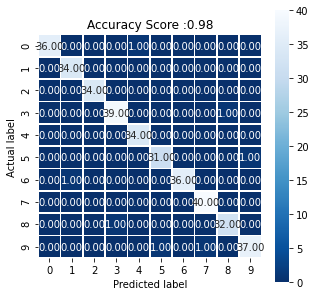

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{accuracy:.2f}'
plt.title(A)
plt.show()